<a href="https://colab.research.google.com/github/JuniorTorresMTJ/Bootcamp_Alura_2/blob/main/notebook/Analisando_Dados_S%C3%A1ude_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
ANALISANDO DADOS DA SAÚDE COM PYTHON E PANDAS
***

#Bibliotecas

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

#Aula 01 - Aquisição e leitura de dados reais

##Carregando a Base

A nossa base está muito suja, para isso precisamos arrumar algumas coisas como: 

- ignorar as primeras e ultimas linhas
- mudar o enconding dos dados 
- mudar o ponto e virgulas dos nossos dados 
- informar que é separado por ";"

In [2]:
dados = pd.read_csv("https://github.com/JuniorTorresMTJ/Bootcamp_Alura_2/blob/main/dados/A151346189_28_143_208.csv?raw=True", encoding="ISO-8859-1", 
            skiprows=3, sep=";", skipfooter = 12, thousands=".", decimal ="," )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [3]:
dados.describe()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
count,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,...,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01
mean,1.512685e+07,2.271016e+07,2.459419e+07,2.543196e+07,2.651125e+07,2.785858e+07,2.833297e+07,2.780032e+07,2.788751e+07,2.714885e+07,2.474878e+07,2.873955e+07,2.777958e+07,2.802152e+07,3.118086e+07,3.055947e+07,3.206774e+07,3.158067e+07,3.261120e+07,3.306823e+07,3.241981e+07,3.218939e+07,3.116798e+07,3.156009e+07,2.992881e+07,3.299925e+07,3.341603e+07,3.386193e+07,3.299857e+07,3.377663e+07,3.450811e+07,3.357103e+07,3.320255e+07,3.426058e+07,3.372213e+07,3.306842e+07,3.274396e+07,3.454084e+07,3.483417e+07,3.514808e+07,...,4.659257e+07,4.485862e+07,4.644534e+07,4.694370e+07,4.581992e+07,4.631066e+07,4.537205e+07,4.451216e+07,4.513069e+07,4.298447e+07,4.628040e+07,4.687294e+07,4.740435e+07,4.714298e+07,4.820453e+07,4.876378e+07,4.713071e+07,4.799957e+07,4.645374e+07,4.512771e+07,4.771386e+07,4.543018e+07,4.719978e+07,4.816447e+07,5.027433e+07,4.845567e+07,5.085898e+07,5.108601e+07,4.950977e+07,5.115926e+07,4.865212e+07,4.723330e+07,4.914862e+07,4.761848e+07,4.759367e+07,4.101366e+07,4.419363e+07,4.732999e+07,5.449551e+07,5.993732e+09
std,1.915919e+07,3.087944e+07,3.251673e+07,3.333907e+07,3.754077e+07,3.867689e+07,3.929297e+07,3.774891e+07,3.822654e+07,3.667139e+07,3.430265e+07,3.926323e+07,3.798802e+07,3.847297e+07,4.310788e+07,4.137587e+07,4.382047e+07,4.373064e+07,4.493195e+07,4.676027e+07,4.472374e+07,4.465751e+07,4.249073e+07,4.345134e+07,4.112873e+07,4.590237e+07,4.661917e+07,4.658377e+07,4.580069e+07,4.662104e+07,4.756922e+07,4.704992e+07,4.517352e+07,4.835110e+07,4.796588e+07,4.603549e+07,4.662189e+07,4.871679e+07,4.792798e+07,4.943092e+07,...,6.202556e+07,5.770511e+07,6.234915e+07,6.250715e+07,5.928142e+07,6.017879e+07,5.942427e+07,5.889815e+07,5.906176e+07,5.650940e+07,6.049750e+07,6.114294e+07,6.192571e+07,6.115437e+07,6.221664e+07,6.337072e+07,6.072640e+07,6.248640e+07,6.045441e+07,5.991645e+07,6.282883e+07,5.936300e+07,6.111061e+07,6.293618e+07,6.457698e+07,6.235590e+07,6.532398e+07,6.636032e+07,6.343915e+07,6.631342e+07,6.226009e+07,6.060018e+07,6.423455e+07,6.131808e+07,6.217103e+07,5.290071e+07,5.685693e+07,6.225531e+07,7.397429e+07,8.057807e+09
min,6.578895e+05,7.779393e+05,7.186880e+05,8.399944e+05,8.623480e+05,8.324407e+05,9.966931e+05,8.942712e+05,9.104242e+05,1.191770e+

Os números estão em notação cientifica, com isso fica muito difícil fazer a leitura e interpretação dos dados. 

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 154 entries, Unidade da Federação to Total
dtypes: float64(151), object(3)
memory usage: 32.6+ KB


Vamos mudar o formato dos números

In [5]:
pd.options.display.float_format ="{:.2f}".format

In [6]:
dados.mean()

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2020/Abr     41013660.39
2020/Mai     44193633.75
2020/Jun     47329994.46
2020/Jul     54495511.57
Total      5993731798.30
Length: 151, dtype: float64

In [7]:
dados["2008/Ago"].head(9)

0    3231494.61
1    2089107.14
2    9352532.70
3     894271.18
4   23341218.03
5    1475551.38
6    5413710.38
7   15195312.89
8   10549176.40
Name: 2008/Ago, dtype: float64

In [8]:
dados["2008/Ago"].mean()

27800320.306666665

In [9]:
Ago = dados["2008/Ago"].sort_values(ascending = False)
Ago

19   184854516.35
16    84722528.10
20    56982774.90
22    56113054.70
18    50912706.60
15    46931248.28
12    35457038.66
21    31250854.33
9     27851438.72
4     23341218.03
25    20650730.67
7     15195312.89
26    13710857.89
11    12872578.37
17    12588595.77
10    10640817.47
8     10549176.40
23     9671553.45
13     9373432.00
2      9352532.70
24     9243148.81
6      5413710.38
14     5238398.50
0      3231494.61
1      2089107.14
5      1475551.38
3       894271.18
Name: 2008/Ago, dtype: float64

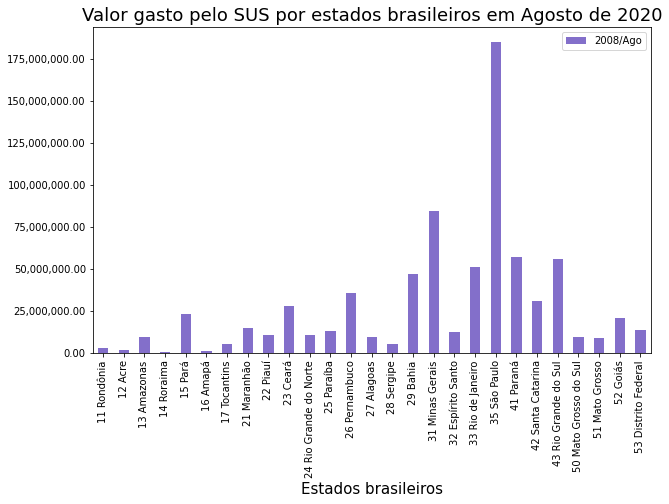

In [10]:
ax = dados.plot(x="Unidade da Federação", y="2008/Ago", kind="bar", color="#836fca", figsize =(10,6))
ax.yaxis.set_major_formatter(tick.StrMethodFormatter('{x:,.2f}'))
plt.title("Valor gasto pelo SUS por estados brasileiros em Agosto de 2020", size=18)
plt.xlabel("Estados brasileiros", size = 15)
plt.show()

Veja que no eixo X ficou o index da uf, mas isso não traz informação nenhuma para a nossa visualização, vamos tirar e colocar em outras coluna. 

##Arrumando os estados

Para isso vamos fazer slices,e criar uma nova coluna em nosso dataframe chamada `id_uf`

In [11]:
dados['id_uf'] = dados["Unidade da Federação"].str.slice(0,3)
dados['id_uf']

0     11 
1     12 
2     13 
3     14 
4     15 
5     16 
6     17 
7     21 
8     22 
9     23 
10    24 
11    25 
12    26 
13    27 
14    28 
15    29 
16    31 
17    32 
18    33 
19    35 
20    41 
21    42 
22    43 
23    50 
24    51 
25    52 
26    53 
Name: id_uf, dtype: object

In [12]:
dados["Unidade da Federação"] = dados["Unidade da Federação"].str.slice(3,)

In [13]:
dados.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total,id_uf
0,Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,8438077.45,7656644.83,8047742.98,8657206.23,8150893.68,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,929129659.72,11
1,Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,-,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,2348760.00,3139155.41,2765062.92,4540084.78,4120228.96,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,-,420668039.63,12
2,Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,14376990.41,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1771654871.23,13
3,Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,2878177.60,2921978.36,2794080.79,2512259.50,2508514.18,2635287.45,2914195.21,2881281.13,2740423.51,2695484.62,2613895.43,3020718.84,2860584.22,2740088.01,2689103.41,2985029.23,27718

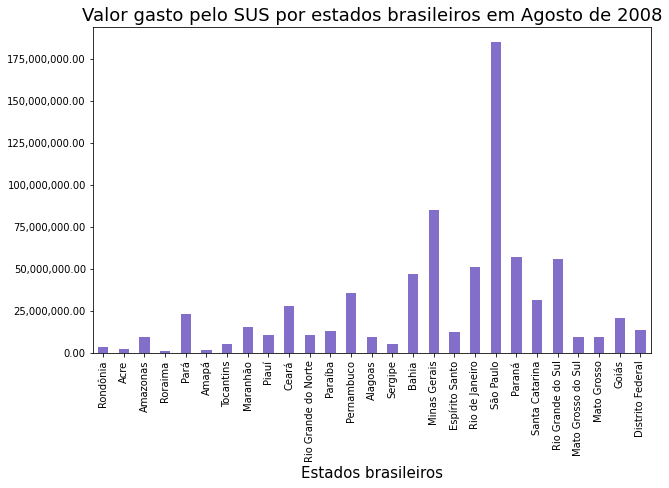

In [53]:
ax = dados.plot(x="Unidade da Federação", y="2008/Ago", kind="bar", color="#836fca", figsize =(10,6), legend=None)
ax.yaxis.set_major_formatter(tick.StrMethodFormatter('{x:,.2f}'))
plt.title("Valor gasto pelo SUS por estados brasileiros em Agosto de 2008", size=18)
plt.xlabel("Estados brasileiros", size = 15)
plt.show()

Agora vamos plotar o mês mais recente desse dataset que é o Ago/2020

In [28]:
dados["2020/Ago"]

0      10285455.78
1                -
2      14726443.67
3       2826486.18
4      39911193.02
5       2942273.94
6       8240261.38
7      28587541.78
8      23210624.20
9      59808605.59
10     24929930.72
11     22130016.81
12     75704177.72
13     19754741.78
14     11014180.89
15     80793117.08
16    168024412.95
17     32188873.88
18     95274486.35
19    346512263.17
20    129375911.54
21     63972379.36
22    101374341.51
23     19241624.02
24     17790649.87
25     43984702.05
26     26526196.39
Name: 2020/Ago, dtype: object

Como podemos ver agora, na linha do indice 1, ficou faltando um valor, vamos substituir esse valor com a média dos meses anteriores do Acre

In [36]:
dados.mean(axis=1)

0     12214363.29
1      5571762.11
2     23303660.03
3      4009891.85
4     58320213.90
5      3829797.12
6     13147113.01
7     47797427.04
8     27985267.11
9     81459829.85
10    32560268.55
11    32469221.93
12   105829359.82
13    27668112.66
14    14856412.70
15   120880617.10
16   252021705.37
17    41263623.56
18   127453152.46
19   511869497.19
20   181315956.94
21    96336737.40
22   157281422.69
23    28563420.95
24    26789711.91
25    61228397.84
26    31912934.75
dtype: float64

In [37]:
repl = dados['2020/Ago']

In [40]:
repl.replace("-", 5571762.11, inplace=True )

In [41]:
dados.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total,id_uf
0,Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,8438077.45,7656644.83,8047742.98,8657206.23,8150893.68,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,929129659.72,11
1,Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,-,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,2348760.00,3139155.41,2765062.92,4540084.78,4120228.96,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,5571762.11,420668039.63,12
2,Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,14376990.41,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1771654871.23,13
3,Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,2878177.60,2921978.36,2794080.79,2512259.50,2508514.18,2635287.45,2914195.21,2881281.13,2740423.51,2695484.62,2613895.43,3020718.84,2860584.22,2740088.01,2689103.41,2985029

Agora vamos definir nossa coluna como o tipo de dados **Float64**

In [70]:
dados["2020/Ago"] = dados["2020/Ago"].astype('float64')

##Criando a Visualização

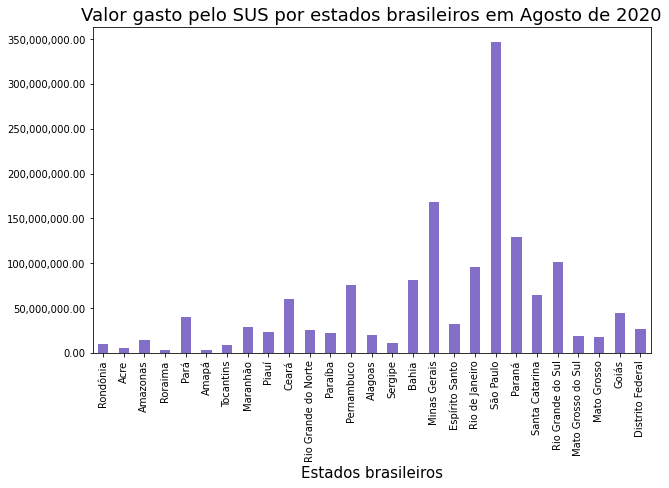

In [72]:
ax = dados.plot(x="Unidade da Federação", y="2020/Ago", kind="bar", color="#836fca", figsize =(10,6),legend=None)
ax.yaxis.set_major_formatter(tick.StrMethodFormatter('{x:,.2f}'))
plt.title("Valor gasto pelo SUS por estados brasileiros em Agosto de 2020", size=18)
plt.xlabel("Estados brasileiros", size = 15)
plt.show()

Agora vamos ordenar por estados

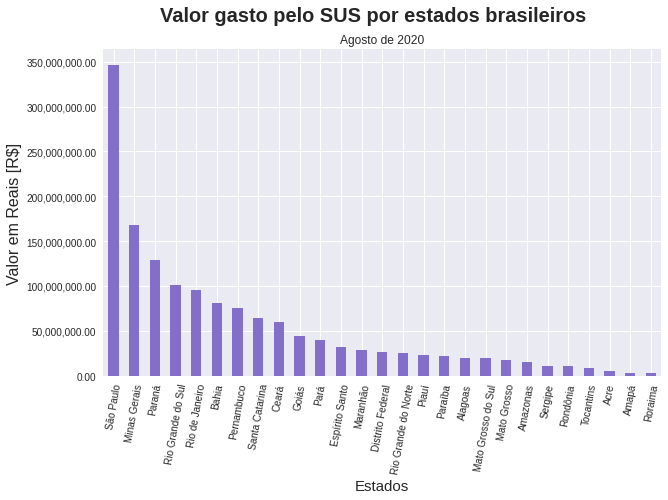

In [99]:
dados_sort = dados[["Unidade da Federação", "2020/Ago"]].sort_values(by = "2020/Ago", ascending = False)

plt.style.use('seaborn')
ax = dados_sort.plot(x="Unidade da Federação", y = "2020/Ago", kind ="bar", figsize=(10,6), legend=None, color="#836fca")
ax.yaxis.set_major_formatter(tick.StrMethodFormatter('{x:,.2f}'))
plt.title("Agosto de 2020")
plt.suptitle("Valor gasto pelo SUS por estados brasileiros", size=20, weight='bold' )
plt.xlabel("Estados", size = 15)
plt.ylabel("Valor em Reais [R$]", size = 16)
plt.xticks(rotation=80)

plt.show()